In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [46]:
parent_path=os.path.join(os.getcwd(), os.pardir)
file_path=os.path.join(parent_path, "raw_data/train.csv")

In [47]:
data=pd.read_csv(file_path).copy()
data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


<Axes: xlabel='size', ylabel='Count'>

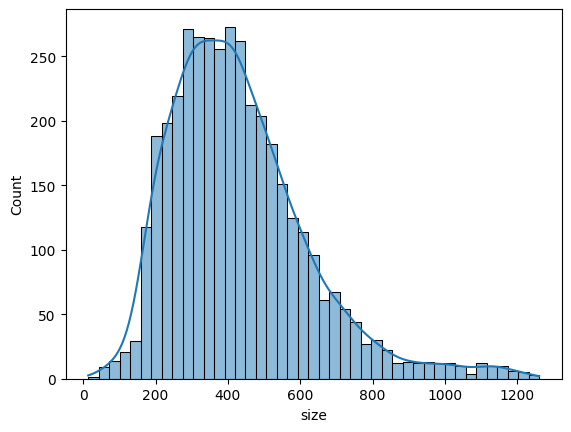

In [48]:
data["size"]=data["full_text"].apply(lambda x : len(x.split()))
sns.histplot(data["size"], kde=True)

<Axes: xlabel='N_paragraphs', ylabel='Count'>

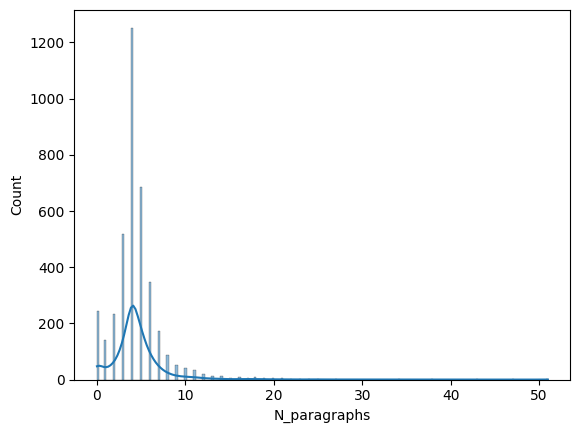

In [49]:
data["N_paragraphs"]=data["full_text"].apply(lambda x : x.count("\n\n"))
sns.histplot(data["N_paragraphs"], kde=True)

In [52]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

X=data["full_text"]
y=data[["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]]